In [1]:
import tensorflow as tf
import tensorflow.keras as k
import tensorflow.keras.layers as l

### ResNet34 has v1 architecture. v1.5 is not possible. Although ResNet34v2 version possible but v2 design is used in 50 plus layers resnets.
Here ResNetv1 and v2 implemented.

# Table of Contents
- [1-ResNet34 and ResNet34V2 side by side comparison picture](#01)
- [2-Writing ResNet50 architecture](#02)
- [3-Writing ResNet50V2 architecture](#03)

# 1-ResNet34 and ResNet34V2 side by side comparison picture<a id="01"></a>

![resnet34s part1 architecture](../img/resnet34comp1.PNG)
![resnet34s part2 architecture](../img/resnet34comp2.PNG)
![resnet34s part2 architecture](../img/resnet34comp3.PNG)

# 2-Writing ResNet34 architecture<a id="02"></a>

In [2]:
def residual_block(x, filters, kernel_size=3, stride=1, conv_shortcut=False, use_bias=False, name=None):
    """
    A residual block as described in the paper "Deep Residual Learning for Image Recognition"
    conv_shortcut: use convolutional shortcut if True, identity shortcut if False
    """
    
    # assuming image_data_format() is "channels_last" i.e. batch_size, h, w, c
    bn_axis = 3
    
    if conv_shortcut:
        shortcut = l.Conv2D(filters, 1, strides=stride, use_bias=use_bias, name=name + "conv0")(x)
        shortcut = l.BatchNormalization(axis=bn_axis, name=name + 'bn0')(shortcut)
    else:
        shortcut = x

    x = l.Conv2D(filters, kernel_size, strides=stride, padding="same", use_bias=use_bias, name=name + "conv1")(x)
    x = l.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + "bn1")(x)
    x = l.Activation("relu", name=name + "relu1")(x)

    # x = l.ZeroPadding2D(padding=1, name=name + "pad2")(x)
    # x = l.Conv2D(filters, kernel_size, strides=1, name=name + "conv2",)(x)
    # or
    x = l.Conv2D(filters, kernel_size, strides=1, padding='same', use_bias=use_bias, name=name + "conv2",)(x)
    x = l.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + "bn2")(x)
    
    x = l.Add(name=name + "add")([shortcut, x])
    x = l.Activation("relu", name=name + "relu2_out")(x)
    return x

def ResNet34(input_shape=(224, 224, 3), classes=1000):
    X_input = l.Input(shape=input_shape)
    X = l.ZeroPadding2D(padding=3, name="conv1_pad")(X_input)
    X = l.Conv2D(64, 7, strides=2, name='conv1')(X)
    X = l.BatchNormalization(axis=3, name='conv1_bn')(X)
    X = l.Activation('relu',name='conv1_relu')(X)
    X = l.ZeroPadding2D(padding=1, name="pool1_pad")(X)
    X = l.MaxPooling2D(3, strides=2, name='poo11')(X)

    X = residual_block(X, filters=64, stride=1, conv_shortcut=False, name='g1_b1_conv_shortcut/')
    X = residual_block(X, filters=64, stride=1, conv_shortcut=False, name='g1_b2_id_shortcut/')
    X = residual_block(X, filters=64, stride=1, conv_shortcut=False, name='g1_b3_id_shortcut/')

    X = residual_block(X, filters=128, stride=2, conv_shortcut=True, name='g2_b1_conv_shortcut/')
    X = residual_block(X, filters=128, stride=1, conv_shortcut=False, name='g2_b2_id_shortcut/')
    X = residual_block(X, filters=128, stride=1, conv_shortcut=False, name='g2_b3_id_shortcut/')
    X = residual_block(X, filters=128, stride=1, conv_shortcut=False, name='g2_b4_id_shortcut/')

    X = residual_block(X, filters=256, stride=2, conv_shortcut=True, name='g3_b1_conv_shortcut/')
    X = residual_block(X, filters=256, stride=1, conv_shortcut=False, name='g3_b2_id_shortcut/')
    X = residual_block(X, filters=256, stride=1, conv_shortcut=False, name='g3_b3_id_shortcut/')
    X = residual_block(X, filters=256, stride=1, conv_shortcut=False, name='g3_b4_id_shortcut/')
    X = residual_block(X, filters=256, stride=1, conv_shortcut=False, name='g3_b5_id_shortcut/')
    X = residual_block(X, filters=256, stride=1, conv_shortcut=False, name='g3_b6_id_shortcut/')

    X = residual_block(X, filters=512, stride=2, conv_shortcut=True, name='g4_b1_conv_shortcut/')
    X = residual_block(X, filters=512, stride=1, conv_shortcut=False, name='g4_b2_id_shortcut/')
    X = residual_block(X, filters=512, stride=1, conv_shortcut=False, name='g4_b3_id_shortcut/')

    X = l.GlobalAveragePooling2D()(X)
    X = l.Dense(classes, activation='softmax', name='fc' + str(classes))(X)
    model = k.models.Model(inputs=X_input, outputs=X, name='ResNet34')

    return model

In [3]:
model = ResNet34(input_shape=(224, 224, 3), classes=1000)
model.summary()

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

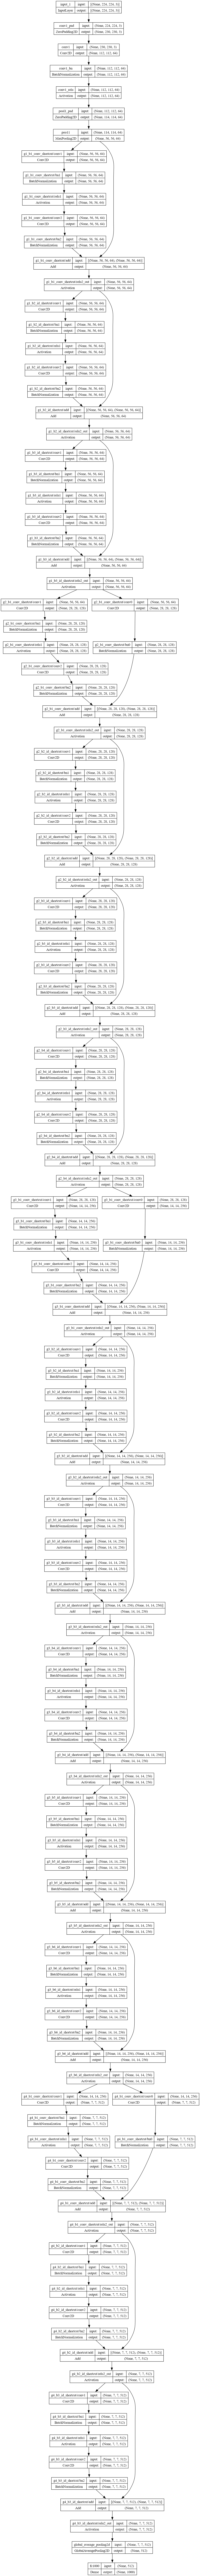

In [4]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# 3-Writing ResNet34v2 architecture<a id="03"></a>

In [5]:
def residual_blockv2(x, filters, kernel_size=3, stride=1, conv_shortcut=False, use_bias=False, name=None):
    """
    A residual block as described in the paper "Deep Residual Learning for Image Recognition"
    conv_shortcut: use convolutional shortcut if True, identity shortcut if False
    """
    
    # assuming image_data_format() is "channels_last" i.e. batch_size, h, w, c
    bn_axis = 3
    preact = l.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + "preact_bn")(x)
    preact = l.Activation("relu", name=name + "preact_relu")(preact)

    if conv_shortcut:
        shortcut = l.Conv2D(filters, 1, strides=stride, use_bias=use_bias, name=name + "conv0")(preact)
    else:
        shortcut = (l.MaxPooling2D(1, strides=stride, name=name+'maxpool0')(x) if stride > 1 else x)

    x = l.Conv2D(filters, kernel_size, strides=stride, padding='same', use_bias=use_bias, name=name + "conv1")(preact)
    x = l.BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + "bn1")(x)
    x = l.Activation("relu", name=name + "relu1")(x)

    # x = l.ZeroPadding2D(padding=1, name=name + "pad2")(x)
    # x = l.Conv2D(filters, kernel_size, strides=1, name=name + "conv2",)(x)
    # or
    x = l.Conv2D(filters, kernel_size, strides=1, padding='same', use_bias=use_bias, name=name + "conv2",)(x)
    
    x = l.Add(name=name + "add_out")([shortcut, x])
    return x

def ResNet34v2(input_shape=(224, 224, 3), classes=1000):
    X_input = l.Input(shape=input_shape)
    X = l.ZeroPadding2D(padding=3, name="conv1_pad")(X_input)
    X = l.Conv2D(64, 7, strides=2, name='conv1')(X)
    X = l.ZeroPadding2D(padding=1, name="pool1_pad")(X)
    X = l.MaxPooling2D(3, strides=2, name='poo11')(X)

    X = residual_blockv2(X, filters=64, stride=1, conv_shortcut=False, name='g1_b1_conv_shortcut/')
    X = residual_blockv2(X, filters=64, stride=1, conv_shortcut=False, name='g1_b2_id_shortcut/')
    X = residual_blockv2(X, filters=64, stride=2, conv_shortcut=False, name='g1_b3_maxpool_shortcut/')

    X = residual_blockv2(X, filters=128, stride=1, conv_shortcut=True, name='g2_b1_conv_shortcut/')
    X = residual_blockv2(X, filters=128, stride=1, conv_shortcut=False, name='g2_b2_id_shortcut/')
    X = residual_blockv2(X, filters=128, stride=1, conv_shortcut=False, name='g2_b3_id_shortcut/')
    X = residual_blockv2(X, filters=128, stride=2, conv_shortcut=False, name='g2_b4_maxpool_shortcut/')

    X = residual_blockv2(X, filters=256, stride=1, conv_shortcut=True, name='g3_b1_conv_shortcut/')
    X = residual_blockv2(X, filters=256, stride=1, conv_shortcut=False, name='g3_b2_id_shortcut/')
    X = residual_blockv2(X, filters=256, stride=1, conv_shortcut=False, name='g3_b3_id_shortcut/')
    X = residual_blockv2(X, filters=256, stride=1, conv_shortcut=False, name='g3_b4_id_shortcut/')
    X = residual_blockv2(X, filters=256, stride=1, conv_shortcut=False, name='g3_b5_id_shortcut/')
    X = residual_blockv2(X, filters=256, stride=2, conv_shortcut=False, name='g3_b6_maxpool_shortcut/')

    X = residual_blockv2(X, filters=512, stride=1, conv_shortcut=True, name='g4_b1_conv_shortcut/')
    X = residual_blockv2(X, filters=512, stride=1, conv_shortcut=False, name='g4_b2_id_shortcut/')
    X = residual_blockv2(X, filters=512, stride=1, conv_shortcut=False, name='g4_b3_maxpool_shortcut/')

    X = l.BatchNormalization(axis=3, epsilon=1.001e-5, name="post_bn")(X)
    X = l.Activation("relu", name="post_relu")(X)

    X = l.GlobalAveragePooling2D()(X)
    X = l.Dense(classes, activation='softmax', name='fc' + str(classes))(X)
    model = k.models.Model(inputs=X_input, outputs=X, name='ResNet34v2')

    return model

In [6]:
modelv2 = ResNet34v2(input_shape=(224, 224, 3), classes=1000)
modelv2.summary()

Model: "ResNet34v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

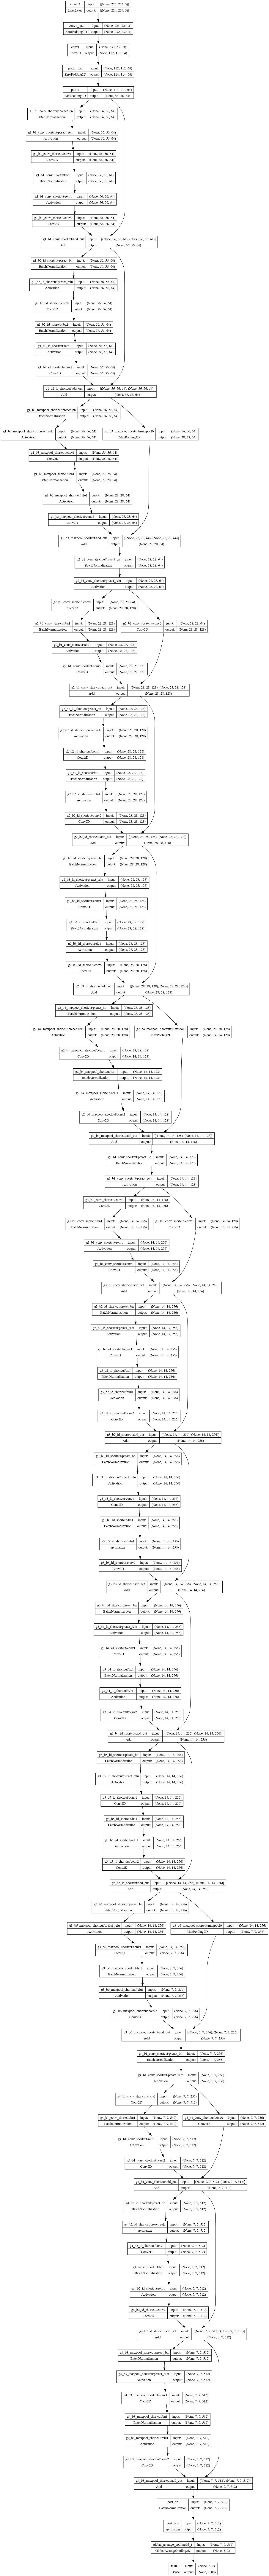

In [7]:
tf.keras.utils.plot_model(modelv2, to_file='model.png', show_shapes=True, show_layer_names=True)